<a href="https://colab.research.google.com/github/benhocker/EA31337-Libre/blob/main/EA31337_Libre_Interactive_Backtesting_(v1)_%5Bv20210418%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EA31337 Libre - Interactive Backtesting

This [Colab](https://colab.research.google.com/notebooks/intro.ipynb) aims at backtesting a [EA31337 Libre](https://github.com/EA31337/EA31337-Libre) Forex trading robot using [EA Tester](https://github.com/EA31337/EA-Tester).

To use this tool interactively, login using your Google account, then follow the instructions.

For the better performance, you can connect to your local runtime.

If you've any suggestions, feel free to leave the comments.

## Install EA Tester and dependencies

To install, click the play button below. This is only required when initializing your environment for the first time or next time when visiting this page. This can take few minutes.

In [ ]:
%%shell
rm -fr EA-Tester FX-BT-Scripts
git clone --depth 1 --branch dev https://github.com/EA31337/EA-Tester || true
git clone --depth 1 --branch master https://github.com/FX31337/FX-BT-Scripts.git || true
EA-Tester/scripts/provision-colab.sh

Cloning into 'EA-Tester'...
remote: Enumerating objects: 149, done.
remote: Counting objects: 100% (149/149), done.
remote: Compressing objects: 100% (121/121), done.
remote: Total 149 (delta 34), reused 70 (delta 23), pack-reused 0
Receiving objects: 100% (149/149), 182.26 KiB | 8.28 MiB/s, done.
Resolving deltas: 100% (34/34), done.
Cloning into 'FX-BT-Scripts'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 34 (delta 1), reused 14 (delta 1), pack-reused 0
Unpacking objects: 100% (34/34), done.
OS: Linux cc8ce9313062 4.19.112+ #1 SMP Thu Jul 23 08:00:38 PDT 2020 x86_64 x86_64 x86_64 GNU/Linux
+ case "$(uname -s)" in
++ uname -s
+ echo 'Configuring APT...'
Configuring APT...
+ tee /etc/apt/apt.conf.d/99norecommend
+ sed s/1/0/
+ grep -we Recommends -e Suggests
+ apt-config dump
APT::Install-Recommends "0";
APT::Install-Suggests "0";
+ apt-config dump
+ grep -we Recommends -e Suggests

## Run backtest

Backtesting hints:

*   Use interactive form widgets on the right to adjust the backtest parameters before the run.
*   Test for 1 year could take around 10-15 minutes, depending on the EA mode and backtest configuration.
*   To access files (such as platform files, logs, charts and other), click the folder icon on the left.
*   To forcibly kill the test during run, click the stop button 3 times.

<!-- **Important note: This backtest form is under maintainance and may not work, please come back later on.** -->

### [EA31337 Libre](https://github.com/EA31337/EA31337-Libre) (default params)

Use this form to backtest EA with the default parameters.

Releases page: https://github.com/EA31337/EA31337-Libre/releases


In [ ]:
%%shell
# Specifies deposit amount to test (in dollars).
export BT_DEPOSIT="10000" #@param ["100", "1000", "2000", "10000", "20000", "100000"] {allow-input: true}

# Specifies range of days in each month to test. Default: 1-31.
export BT_DAYS="1-31" #@param ["1", "1-2", "1-7", "1-15", "16-31", "1-31"] {allow-input: true}

# Specifies range of months in each year to test. Default: 1-12.
export BT_MONTHS="1-2" #@param ["1", "1-2", "1-6", "6-12", "1-12"] {allow-input: true}

# Specifies range of years to test. Default: 2019.
export BT_YEARS="2020" #@param ["2020", "2019", "2018", "2017"] {allow-input: true}

# Specifies timeframe to use for the test.
export BT_PERIOD="M1" #@param ["M1", "M5", "M15", "M30", "H1", "H4", "D1"]

# Specifies spread to test in points. Default: 10.
export BT_SPREAD=10 #@param {type:"slider", min:0, max:50, step:1}

# Specifies number of digits after decimal point for the current symbol prices. Default: 5.
export BT_DIGITS=5 #@param {type:"slider", min:4, max:5, step:1}

# Specifies type of backtest data being tested.
# Values: 0 (default) - Every tick, 1 - Control points, 2 - Open prices only.
export BT_TESTMODEL="1" #@param ["0", "1", "2"]

# Specifies EA to backtest (filename, URL or pattern).
EA_VERSION="v1.003" #@param ["v1.003", "v1.002", "v1.001", "v1.000"]
export TEST_EXPERT="https://github.com/EA31337/EA31337-Libre/releases/download/${EA_VERSION}/EA31337-Libre-${EA_VERSION}.ex4" #@param {type:"string"}

# Specifies version of MetaTrader to use for the test.
export MT_VER="4.0.0.1320"

# Advanced settings.
export RUN_ON_EXIT="kill_display" # We need to kill display at the end of the test (to avoid cell hangs).

# Backtest troubleshooting.
#export OPT_DRY_RUN=1 # Uncomment to run backtest without running the actual test.
#export OPT_TRACE=1 # Uncomment to enable trace messages.

# Link the platform dir for easier access.
source EA-Tester/scripts/.vars.inc.sh
source EA-Tester/scripts/.funcs.cmds.inc.sh
[ -d "$TERMINAL_DIR" ] && ln -fsv "$TERMINAL_DIR" "$PWD/"

# Run the backtest.
run_backtest -O /content/_results -v -t 2>backtest-stderr.txt

# Note:
# Due to technical difficulties, we need to print the entire file after the test to avoid cell to hang.
# To see the actual progress of backtest, you can double click on backtest-stderr.txt file from the file explorer on the left.
cat backtest-stderr.txt

Streaming output truncated to the last 5000 lines.
0	23:39:11.555	2020.01.17 20:22:02  EA31337-Libre-v1.001 EURUSD,M1: 2020.01.17 20:22:02: WARNING: EURUSD@M30: Soft limit of trade margin reached
0	23:39:11.555	2020.01.17 20:23:02  EA31337-Libre-v1.001 EURUSD,M1: 2020.01.17 20:23:02: WARNING: EURUSD@M15: Not enough bars to trade
0	23:39:11.555	2020.01.17 20:23:02  EA31337-Libre-v1.001 EURUSD,M1: 2020.01.17 20:23:02: WARNING: EURUSD@M30: Soft limit of trade margin reached
0	23:39:11.556	2020.01.17 20:24:02  EA31337-Libre-v1.001 EURUSD,M1: 2020.01.17 20:24:02: WARNING: EURUSD@M15: Not enough bars to trade
0	23:39:11.556	2020.01.17 20:24:02  EA31337-Libre-v1.001 EURUSD,M1: 2020.01.17 20:24:02: WARNING: EURUSD@M30: Soft limit of trade margin reached
0	23:39:11.556	2020.01.17 20:25:01  EA31337-Libre-v1.001 EURUSD,M1: 2020.01.17 20:25:01: WARNING: EURUSD@M15: Not enough bars to trade
0	23:39:11.556	2020.01.17 20:25:01  EA31337-Libre-v1.001 EURUSD,M1: 2020.01.17 20:25:01: WARNING: EURUSD@M30:

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



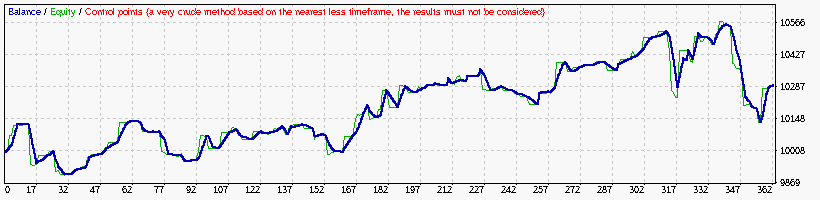

In [ ]:
# Run this cell to display the latest backtest chart (run after above backtest is completed).
from IPython.display import Image
import glob, os
latest_image = max(glob.iglob('_results/*.gif'), key=os.path.getmtime)
Image(open(latest_image,'rb').read())

In [ ]:
# Run this cell to refresh and display the results below.
%%shell
find _results -name "*-Report.txt" -print -exec cat {} ';'

_results/EA31337-Libre-v1.001-Report.txt



                                                                Strategy Tester Report
                                                                 EA31337-Libre-v1.001
                                                                     (Build 1320)

  Symbol                            EURUSD (Euro vs US Dollar)
  Period                            1 Minute (M1) 2020.01.01 23:41 - 2020.02.28 21:59 (2020.01.01 - 2020.02.29)
  Model                             Control points (a very crude method, the results must not be considered)
                                    __Strategy_Active__="-- Active strategy --"; EA_Strategy=23; __Strategy_Timeframes__="--
                                    [M1=1,M5=2,M15=4,M30=8,H1=16,H8=32...] --"; EA_Strategy_Active_Tf=12; __EA_Risk_Params__="-- EA's risk
  Parameters                        management --"; EA_Risk_MarginMax=5; __Logging_Parameters__="-- Settings for logging & messages --";
               

### [EA31337 Libre](https://github.com/EA31337/EA31337-Libre) (custom SET params)

In this section you can bactest EA using your custom parameters.

The following table explains the Active_Tf param values which corresponds to given timeframes.

| Value      | 0    | 1  | 2  | 3     | 4   | 5      | 6      | 7         | 8   | 9      | 10     | 11        | 12      | 13         | 14         | 15            |
|------------|------|----|----|-------|-----|--------|--------|-----------|-----|--------|--------|-----------|---------|------------|------------|---------------|
| Timeframes | None | M1 | M5 | M5+M1 | M15 | M15+M1 | M15+M5 | M15+M5+M1 | M30 | M30+M1 | M30+M5 | M30+M5+M1 | M30+M15 | M30+M15+M1 | M30+M15+M5 | M30+M15+M5+M1 |

In [ ]:
# Run the cell to save the changes to the SET file.
# SET file to customize strategy timeframe params.
%%writefile EA31337-Libre.set
; Timeframes: M1=1,M5=2,M15=4,M30=8,H1=16,H2=32,H4=64
EA_Strategy_Active_Tf=12 #@param {type:"slider", min:0, max:15, step:1}
EA_Strategy=23 #@param {type:"slider", min:0, max:37, step:1}
EA_Risk_MarginMax=5 #@param {type:"slider", min:0, max:50, step:1}

Overwriting EA31337-Libre.set


In [ ]:
%%shell

# Specifies SET file (as defined in above cell). You can select either specific one, or all of them.
SETFILE="EA31337-Libre.set" #@param ["EA31337-Libre.set"] {allow-input: true}

# Specifies deposit amount to test (in dollars).
export BT_DEPOSIT="10000" #@param ["100", "1000", "2000", "10000", "20000", "100000"] {allow-input: true}

# Specifies range of days in each month to test. Default: 1-31.
export BT_DAYS="1-31" #@param ["1", "1-2", "1-7", "1-15", "16-31", "1-31"] {allow-input: true}

# Specifies range of months in each year to test. Default: 1-12.
export BT_MONTHS="1-2" #@param ["1", "1-2", "1-6", "6-12", "1-12"] {allow-input: true}

# Specifies range of years to test. Default: 2019.
export BT_YEARS="2020" #@param ["2020", "2019", "2018", "2017"] {allow-input: true}

# Specifies timeframe to use for the test.
export BT_PERIOD="M1" #@param ["M1", "M5", "M15", "M30", "H1", "H4", "D1"]

# Specifies spread to test in points. Default: 10.
export BT_SPREAD=10 #@param {type:"slider", min:0, max:50, step:1}

# Specifies number of digits after decimal point for the current symbol prices. Default: 5.
export BT_DIGITS=5 #@param {type:"slider", min:4, max:5, step:1}

# Specifies type of backtest data being tested.
# Values: 0 (default) - Every tick, 1 - Control points, 2 - Open prices only.
export BT_TESTMODEL="1" #@param ["0", "1", "2"]

# Specifies EA to backtest (filename, URL or pattern).
EA_VERSION="v1.001" #@param ["v1.001", "v1.000"]
export TEST_EXPERT="https://github.com/EA31337/EA31337-Libre/releases/download/${EA_VERSION}/EA31337-Libre-${EA_VERSION}.ex4" #@param {type:"string"}

# Specifies version of MetaTrader to use for the test.
export MT_VER="4.0.0.1320"

# Advanced settings.
export RUN_ON_EXIT="kill_display" # We need to kill display at the end of the test (to avoid cell hangs).

# Backtest troubleshooting.
#export OPT_DRY_RUN=1 # Uncomment to run backtest without running the actual test.
#export OPT_TRACE=1 # Uncomment to enable trace messages.

# Link the platform dir for easier access.
source EA-Tester/scripts/.vars.inc.sh
source EA-Tester/scripts/.funcs.cmds.inc.sh
[ -d "$TERMINAL_DIR" ] && ln -fsv "$TERMINAL_DIR" "$PWD/"

# Run the backtest.
run_backtest -f "/content/$SETFILE" -O /content/_results/_custom -v -t 2>backtest-stderr.txt

# Note:
# Due to technical difficulties, we need to print the entire file after the test to avoid cell to hang.
# To see the actual progress of backtest, you can double click on backtest-stderr.txt file from the file explorer on the left.
cat backtest-stderr.txt

In [ ]:
# Run this cell to display the latest backtest chart (run after backtest is completed).
from IPython.display import Image
import glob, os
latest_image = max(glob.iglob('_results/_custom/*.gif'), key=os.path.getmtime)
Image(open(latest_image,'rb').read())

In [ ]:
# Run this cell to refresh the results.
%%shell
find _results/_custom -name "*-Report.txt" -print -exec cat {} ';'

## Backtest data analysis

In this section you can analyse data used for the backtesting itself.

### Analysis of historical data files (HST)

In [ ]:
# Show headers of HST files.
%%shell
find -L . -name "*.hst" -print -exec EA-Tester/scripts/py/mt_read.py -f "{}" -t hst-header ';'

./MetaTrader 4/history/default/EURUSD12.hst
headerVersion = 401
copyright = (C)opyright 2003, MetaQuotes Software Corp.
symbol = EURUSD
timeframe = 12
digits = 5
timeSign = 2021-04-17 22:51:20
lastSync = 1970-01-01 00:00:00
unused = b'00000000000000000000000000'

./MetaTrader 4/history/default/EURUSD720.hst
headerVersion = 401
copyright = (C)opyright 2003, MetaQuotes Software Corp.
symbol = EURUSD
timeframe = 720
digits = 5
timeSign = 2021-04-17 22:51:22
lastSync = 1970-01-01 00:00:00
unused = b'00000000000000000000000000'

./MetaTrader 4/history/default/EURUSD120.hst
headerVersion = 401
copyright = (C)opyright 2003, MetaQuotes Software Corp.
symbol = EURUSD
timeframe = 120
digits = 5
timeSign = 2021-04-17 22:51:22
lastSync = 1970-01-01 00:00:00
unused = b'00000000000000000000000000'

./MetaTrader 4/history/default/EURUSD10080.hst
headerVersion = 401
copyright = (C)opyright 2003, MetaQuotes Software Corp.
symbol = EURUSD
timeframe = 10080
digits = 5
timeSign = 2021-04-17 22:51:21
lastS

In [ ]:
# Export HST data into CSV.
%%shell
file_in=$(find -L . -name "EURUSD1.hst" -print)
file_out="_data/EURUSD1.hst.csv"
mkdir _data
./FX-BT-Scripts/fx-data-convert-to-csv.py -i "$file_in" -f hst -o "$file_out" -v
wc -l "$file_out"

mkdir: cannot create directory ‘_data’: File exists
[INFO] Trying to read data from ./MetaTrader 4/history/default/EURUSD1.hst...
373474 _data/EURUSD1.hst.csv


In [ ]:
# Import Python libraries.
!pip3 install mplfinance
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd
#import talib as ta

In [ ]:
# Load CSV data from the file.
hst_m1 = pd.read_csv("_data/EURUSD1.hst.csv", names=["Time", "Open", "High", "Low", "Close", "Volume", "P1", "P2"],
                    index_col=0, parse_dates=True, usecols=[0, 1, 2, 3, 4, 5])
hst_m1.head()

,Open,High,Low,Close,Volume
Time,,,,,
2020-01-01 22:01:12,1.12106,1.12135,1.12106,1.12135,34
2020-01-01 22:02:52,1.12136,1.12139,1.12136,1.12139,11
2020-01-01 22:03:00,1.12135,1.12135,1.12120,1.12122,38
2020-01-01 22:04:03,1.12122,1.12125,1.12122,1.12125,14
2020-01-01 22:05:04,1.12125,1.12127,1.12125,1.12127,28


In [ ]:
hst_m1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 373474 entries, 2020-01-01 22:01:12 to 2020-12-31 21:59:00
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Open    373474 non-null  float64
 1   High    373474 non-null  float64
 2   Low     373474 non-null  float64
 3   Close   373474 non-null  float64
 4   Volume  373474 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 17.1 MB


In [ ]:
# Setup chart.
chart_setup = dict(style='binance', type='candle')

/usr/local/lib/python3.7/dist-packages/mplfinance/_arg_validators.py:45: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  category=UserWarning)


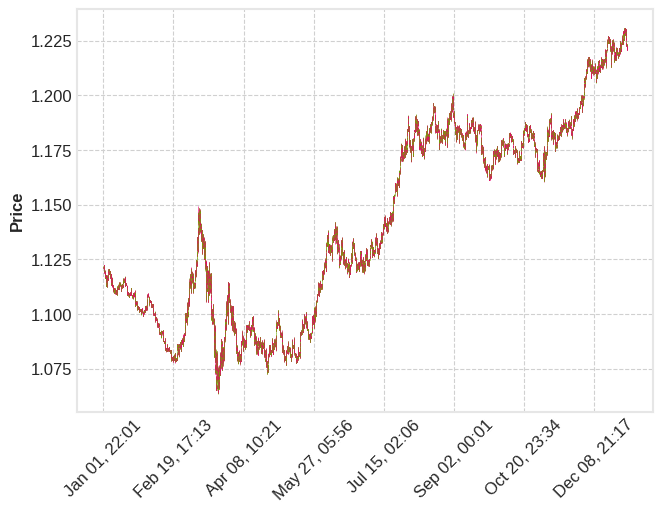

In [ ]:
# Plot chart.
mpf.plot(hst_m1, **chart_setup)

### Analysis of tick data files (FXT)

In [ ]:
# Show headers of FXT files.
%%shell
find -L . -name "*.fxt" -print -exec EA-Tester/scripts/py/mt_read.py -f "{}" -t fxt-header ';'

./MetaTrader 4/tester/history/EURUSD1_0.fxt
headerVersion = 405
copyright = Copyright 2001-2015, MetaQuotes Software Corp.
server = default
symbol = EURUSD
timeframe = 1
modelType = 0
totalBars = 0
firstBarTime = 2020-01-01 22:01:00
lastBarTime = 2020-12-31 21:59:00
padding1 = <...>
modelQuality = 99.9
baseCurrency = EUR
spread = 10
digits = 5
padding2 = <...>
pointSize = 0.00001
minLotSize = 1
maxLotSize = 50000
lotStep = 1
stopLevel = 10
pendingGTC = 1
padding3 = <...>
contractSize = 100000.0
tickValue = 0.0
tickSize = 0.0
profitCalcMode = 0
swapEnabled = 0
swapCalcMode = 0
padding4 = <...>
swapLong = 0.0
swapShort = 0.0
swapRollover = 3
accountLeverage = 100
freeMarginMode = 1
marginCalcMode = 0
marginStopoutLevel = 30
marginStopoutMode = 0
marginRequirements = 0.0
marginMaintenanceReq = 0.0
marginHedgedPosReq = 50000.0
marginLeverageDivider = 1.25
marginCurrency = USD
padding5 = <...>
commissionValue = 0.0
commissionCalcMode = 1
commissionType = 0
indexOfFirstBar = 1
indexOfLastBar

In [ ]:
# Export FXT data into CSV.
# Note: If you see Killed message, that means your instance hit out-of-memory issue. So you need to use shorter period to load the tick data.
%%shell
file_in=$(find -L . -name "*.fxt" -print -quit)
file_out="_data/tick-data.fxt.csv"
mkdir -v _data
./FX-BT-Scripts/fx-data-convert-to-csv.py -i "$file_in" -f fxt -o "$file_out" -v
wc -l "$file_out"

mkdir: cannot create directory ‘_data’: File exists
[INFO] Trying to read data from ./MetaTrader 4/tester/history/EURUSD1_0.fxt...
tcmalloc: large alloc 1834770432 bytes == 0x55af7b3e0000 @  0x7f5cb05991e7 0x55af7a1bdf48 0x55af7a1889c7 0x55af7a307655 0x55af7a2a1828 0x55af7a18c292 0x55af7a26a6ae 0x55af7a18bee9 0x55af7a27d99d 0x55af7a1fffe9 0x55af7a18dbd9 0x55af7a1ced39 0x55af7a1cbc84 0x55af7a18c7f2 0x55af7a1ffd75 0x55af7a1fab0e 0x55af7a1fa813 0x55af7a2c4592 0x55af7a2c490d 0x55af7a2c47b6 0x55af7a29c103 0x55af7a29bdac 0x7f5caf383bf7 0x55af7a29bc8a
/bin/bash: line 3: 11963 Killed                  ./FX-BT-Scripts/fx-data-convert-to-csv.py -i "$file_in" -f fxt -o "$file_out" -v
wc: _data/tick-data.fxt.csv: No such file or directory


CalledProcessError: ignored

In [ ]:
# Import Python libraries.
!pip3 install mplfinance
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd
#import talib as ta

In [ ]:
!head _data/tick-data.fxt.csv

In [ ]:
# Load CSV data from the file.
tdata = pd.read_csv("_data/tick-data.fxt.csv", names=["Time", "Open", "High", "Low", "Close", "Volume", "BarTime", "Flags"],
                    index_col=0, parse_dates=True)
tdata.head()

In [ ]:
tdata.info()

In [ ]:
# OHLC aggregation on OHLC data.
# See: https://stackoverflow.com/a/36223274
ohlc_m1 = tdata.resample('1min').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last'}).ffill()
ohlc_m5 = tdata.resample('5min').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last'}).ffill()
ohlc_m15 = tdata.resample('15min').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last'}).ffill()
# @todo: Add volume column.

In [ ]:
# Setup chart.
chart_setup = dict(style='binance', type='candle')

In [ ]:
# Plot M1 chart.
mpf.plot(ohlc_m1, **chart_setup)

In [ ]:
# Plot M15 chart.
mpf.plot(ohlc_m15, **chart_setup)